<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset8020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [3]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/Pneumonia/')
print(pneumonia_data)
print(len(pneumonia_data))

tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/Tidak Pneumonia/')
print(tidakPneumonia_data)
print(len(tidakPneumonia_data))

['person478_virus_975.jpeg', 'person321_bacteria_1489.jpeg', 'person437_bacteria_1887.jpeg', 'person472_bacteria_2015.jpeg', 'person535_virus_1062.jpeg', 'person407_virus_811.jpeg', 'person505_virus_1017.jpeg', 'person449_bacteria_1940.jpeg', 'person496_bacteria_2095.jpeg', 'person465_bacteria_1980.jpeg', 'person475_virus_972.jpeg', 'person448_bacteria_1934.jpeg', 'person482_bacteria_2045.jpeg', 'person465_bacteria_1979.jpeg', 'person423_bacteria_1857.jpeg', 'person364_bacteria_1660.jpeg', 'person442_virus_900.jpeg', 'person392_virus_782.jpeg', 'person495_bacteria_2094.jpeg', 'person519_virus_1038.jpeg', 'person515_bacteria_2186.jpeg', 'person357_virus_734.jpeg', 'person469_virus_965.jpeg', 'person385_virus_770.jpeg', 'person332_bacteria_1534.jpeg', 'person427_bacteria_1868.jpeg', 'person338_bacteria_1567.jpeg', 'person461_virus_949.jpeg', 'person333_virus_688.jpeg', 'person395_bacteria_1795.jpeg', 'person339_virus_695.jpeg', 'person516_bacteria_2191.jpeg', 'person484_virus_986.jpeg', 

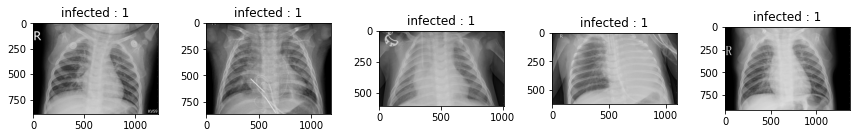

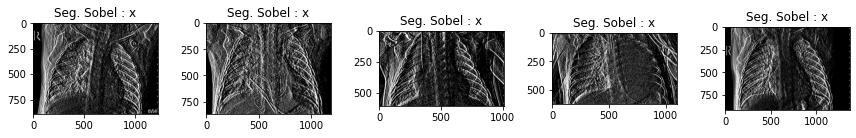

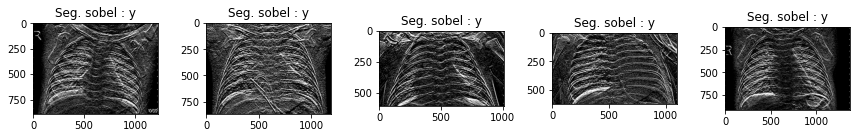

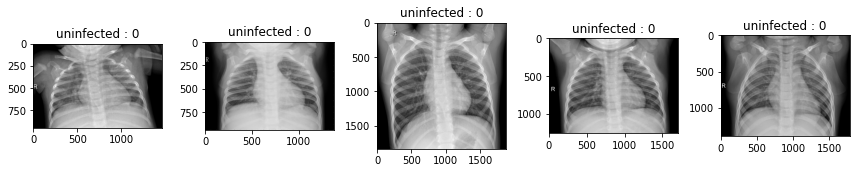

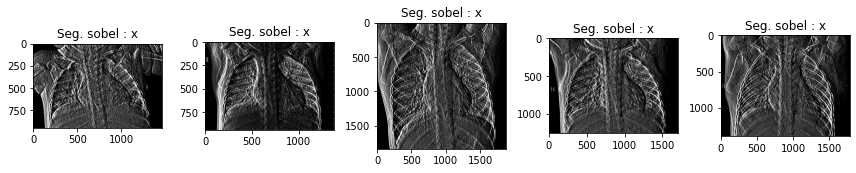

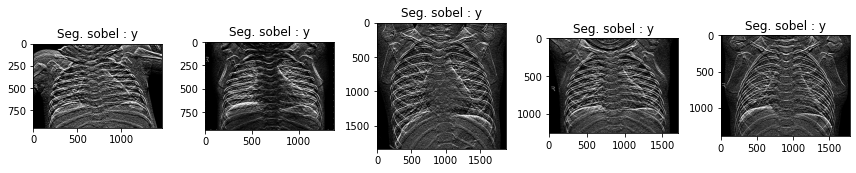

In [6]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi


plt.figure(figsize = (12,12)) #mengatur skala citra yg ditmpilkan
for i in range(5):            #melakukan perulangan sbnyk 5X (dgn nilai awal i=0)
    plt.subplot(1, 5, i+1)    #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img,cmap='gray')           #plot citra sesuai ketmpt yg disediakan baris ke2
    plt.title('infected : 1') #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()        #tampilannya disesuaikan dgn lebar layar

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)     
    edges = cv2.Sobel(img, cv2.CV_8U,1,0, ksize=5)           #proses segmentasi sobel 
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Sobel : x')
    plt.tight_layout()

plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA8020/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  #img = cv2.GaussianBlur (gray, (3,3),0)
  edges = cv2.Sobel (img, cv2.CV_8U,0,1, ksize=5)
  plt.imshow(edges,cmap='gray')
  plt.title ('Seg. sobel : y')
  plt.tight_layout()


#Tahap Visualisasi Citra Tidak Pneumonia

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,1,0, ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,0,1, ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:
#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Pneumonia' + "/" + pneumonia_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten() #ektraksi yg dgunakan moment invariant, cv = opencv, edges var isi gmbar
    a = np.append(a,1) #np library untk mngolh data array
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,1,0, ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA8020/Filecsv/Dataset8020_8ux.csv", x, fmt='%s',delimiter=',' )

In [0]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA8020/DatasetPneumonia8020.csv')
print (len(dataset))
print (dataset)

1013
                H1            H2  ...            H7  Target
0    -8.607400e+01  7.443989e+03  ...  1.663770e+08     1.0
1     6.850999e+03  4.694051e+07  ... -1.271864e+18     1.0
2     1.709605e+13  2.922750e+26  ...  7.284491e+64     1.0
3     2.577409e+01  6.690149e+02  ... -3.703176e+05     1.0
4     1.354593e+01  1.837808e+02  ... -1.076339e+03     1.0
...            ...           ...  ...           ...     ...
1008  2.860695e+01  8.222977e+02  ... -1.409952e+06     0.0
1009 -1.845158e+01  3.459648e+02  ...  4.703497e+04     0.0
1010  2.505254e+04  6.277310e+08  ...  4.629869e+20     0.0
1011  2.321360e+04  5.389648e+08  ...  5.863226e+19     0.0
1012 -1.547339e+04  2.396800e+08  ... -7.673596e+19     0.0

[1013 rows x 8 columns]


In [0]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X)
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

810
203
810
203
1013


,H1,H2,H3,H4,H5,H6,H7
0,-8.607400e+01,7.443989e+03,2.569546e+06,2.563060e+06,6.577585e+12,-2.211372e+08,1.663770e+08
1,6.850999e+03,4.694051e+07,1.286460e+12,1.286477e+12,1.655012e+24,8.814058e+15,-1.271864e+18
2,1.709605e+13,2.922750e+26,1.998699e+40,1.998699e+40,3.994799e+80,3.416987e+53,7.284491e+64
3,2.577409e+01,6.690149e+02,6.929611e+04,6.912923e+04,4.784615e+09,1.788050e+06,-3.703176e+05
4,1.354593e+01,1.837808e+02,1.002009e+04,1.001592e+04,1.003395e+08,1.357816e+05,-1.076339e+03
...,...,...,...,...,...,...,...
1008,2.860695e+01,8.222977e+02,9.434999e+04,9.433746e+04,8.900148e+09,2.705196e+06,-1.409952e+06
1009,-1.845158e+01,3.459648e+02,2.573786e+04,2.549070e+04,6.529183e+08,-4.741303e+05,4.703497e+04
1010,2.505254e+04,6.277310e+08,6.291057e+13,6.290431e+13,3.957149e+27,1.576040e+18,4.629869e+20
1011,2.321360e+04,5.389648e+08,5.004914e+13,5.004339e+13,2.504485e+27,1.161788e+18,5.863226e+19


1.0    649
0.0    161
Name: Target, dtype: int64
1.0    164
0.0     39
Name: Target, dtype: int64


Text(0.5, 1.0, 'TESTING')

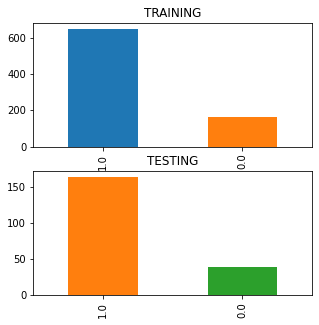

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,5)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(1,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(1,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[ 0.03810681, -0.03541834, -0.0351806 , ..., -0.03515814,
         0.03516006, -0.03515813],
       [ 0.03810681, -0.03541834, -0.0351806 , ..., -0.03515814,
         0.03516006, -0.03515813],
       [ 0.03810688, -0.03541834, -0.0351806 , ..., -0.03515814,
         0.03516006, -0.03515813],
       ...,
       [ 0.03810681, -0.03541834, -0.0351806 , ..., -0.03515814,
         0.03516006, -0.03515813],
       [ 0.03810681, -0.03541834, -0.0351806 , ..., -0.03515814,
         0.03516006, -0.03515813],
       [ 0.03810681, -0.03541834, -0.0351806 , ..., -0.03515814,
         0.03516006, -0.03515813]])

In [0]:
math.sqrt(len(y_train))

14.247806848775006

In [0]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[  2  37]
 [  8 156]]
Akurasi : 0.7783251231527094
presisi : 0.8082901554404145
recall : [0.05128205 0.95121951]
F-Measure : [0.08163265 0.87394958]


In [0]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 82, 84, 81, 83, 82, 81, 84]
p = [73, 83, 75, 78, 76, 78, 72, 80]
r = [81, 75, 96, 80, 90, 81, 91, 84]
f = [77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()

In [0]:
akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")